# Looking at im2latex-100k data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import argparse

%load_ext autoreload
%autoreload 2

from importlib.util import find_spec
if find_spec("im2latex") is None:
    import sys
    sys.path.append('..')

from im2latex.data.im2latex_100k import Im2Latex100K

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
args = argparse.Namespace(min_count=10, max_label_length=150)
dataset = Im2Latex100K(args)
dataset.prepare_data()
dataset.setup()

In [3]:
x, y = next(iter(dataset.test_dataloader()))
print(x.shape, x.dtype, x.min(), x.mean(), x.std(), x.max())
print(y.shape, y.dtype, y.min(), y.max())

torch.Size([37, 1, 128, 480]) torch.float32 tensor(0.) tensor(0.9731) tensor(0.1377) tensor(1.)
torch.Size([37, 152]) torch.int64 tensor(1) tensor(367)


In [4]:
def convert_y_label_to_string(y, dataset=dataset):
    return ''.join([dataset.mapping[i] for i in y])

y_example = y[0]
print(y_example, y_example.shape)
print(convert_y_label_to_string(y_example))

tensor([  1,  79,   9,  24,  13,  51,  10, 139, 160, 123,   5,  30,  30,   4,
          5,  15,   5,  12,   4,   5,   8,   4,   4,  77,   5,   9,  24,  13,
         51,  11,  18,  10,   4,  78,   5,  18,   4,  77,   5,   9,  24,  13,
         51, 151,  18,  10,   4,  78,   5,  12,   4,  77,   5,   9,  24,  13,
         51, 146,  18,  10,   4,  78, 124, 193,  14, 170,   5,  18,  21, 114,
         34,  29,  88,  26,  30,  28,   4,  54,   5,  40,  17,  44,  20,   4,
          9,  24,  13,  51,  10,  11,  79,   9,  24,  13,  51,  10,  13,  79,
          9,  51,  13,  24,  10,  21,   2,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3]) torch.Size([152])
<S>\theta(a-b)\equiv\left\{\begin{array}{cc}{\frac{1}{2}}&{(a-b=0)}\\{0}&{(a-b<0)}\\{1}&{(a-b>0)}\\\end{array}\right.,\hspace{0.5true

<S>\theta(a-b)\equiv\left\{\begin{array}{cc}{\frac{1}{2}}&{(a-b=0)}\\{0}&{(a-b<0)}\\{1}&{(a-b>0)}\\\end{array}\right.,\hspace{0.5truecm}\mathrm{sign}(a-b)=\theta(a-b)-\theta(b-a).<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>


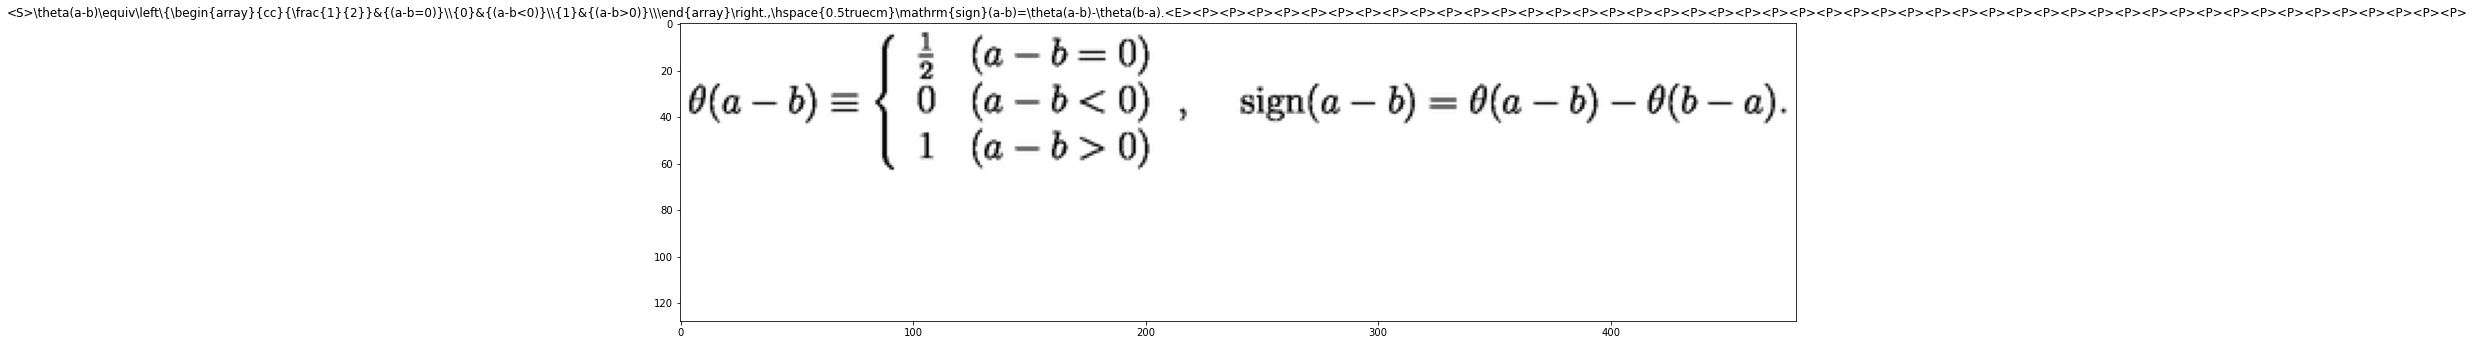

In [5]:
x_example = x[0]
plt.figure(figsize=(20, 20))
# x, y = dataset.data_train[i]
sentence = convert_y_label_to_string(y_example) 
print(sentence)
plt.title(sentence)
plt.imshow(x_example.squeeze(), cmap='gray')
plt.show()